In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [11]:
image1 = cv2.imread(r"./image_file/feature_match/1.jpg")
image2 = cv2.imread(r"./image_file/feature_match/2.jpg")

(-0.5, 1275.5, 1701.5, -0.5)

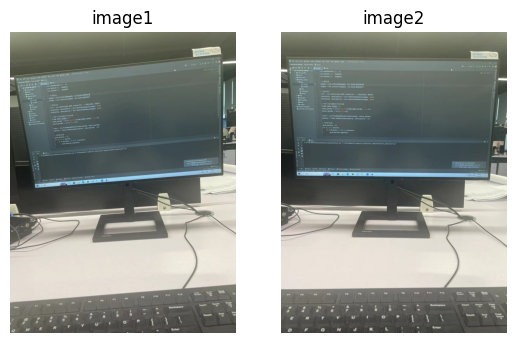

In [12]:
plt.subplot(1, 2, 1)
plt.title('image1')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('image2')
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

### 用SIFT提取特征
#### opencv3.x的版本才支持SUFT算法(cv2.xfeatures2d.SURF_create())

In [13]:
surf = cv2.SIFT_create()
keyPoints1, descriptors1 = surf.detectAndCompute(image1, None)
keyPoints2, descriptors2 = surf.detectAndCompute(image2, None)

### 使用FLANN匹配器进行特征点匹配

In [14]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

### 去掉最近邻m和次近邻n的距离比值太大的匹配结果

In [20]:
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)


### 绘制匹配结果

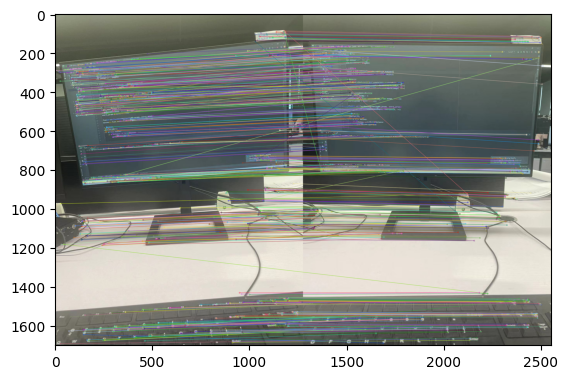

In [21]:
img_match = cv2.drawMatches(image01, keyPoints1, image02, keyPoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(cv2.cvtColor(img_match, cv2.COLOR_BGR2RGB))

### 根据特征匹配矫正图像位置

In [22]:
# 计算转换矩阵
src_pts = np.float32([keyPoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keyPoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5)

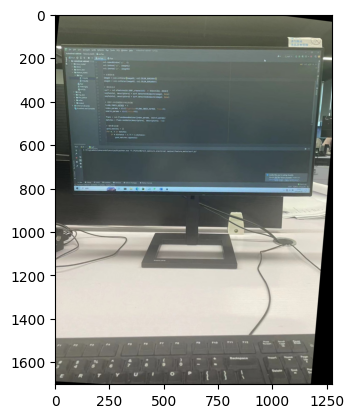

In [24]:
# 透视变换
aligned_image = cv2.warpPerspective(image1, H, (image2.shape[1], image2.shape[0]))
plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))